# EDA on FIFA Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.isnull().sum()

Unnamed: 0          0
ID                  0
Name                0
Age                 0
Photo               0
                 ... 
GKHandling          0
GKKicking           0
GKPositioning       0
GKReflexes          0
Release Clause    253
Length: 89, dtype: int64

In [4]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [5]:
data.fillna(0, inplace = True)

In [6]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle','SlidingTackle']].mean()).mean()))
def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()).mean()))
def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 'Vision','Composure']].mean()).mean()))
def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 'LongPassing']].mean()).mean()))
def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 'Strength']].mean()).mean()))
def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))
def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [7]:
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)
# adding these categories to the data
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [8]:
players = data[['Name','Defending','General','Mental','Passing','Mobility','Power','Rating','Shooting','Flag','Age','Nationality', 'Photo', 'Club_Logo', 'Club']]

In [9]:
import requests
import random
from math import pi
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
def details(row, title, image, age, nationality, photo, logo, club):
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    basic_color = '#37474f'
    color_annotate = '#01579b'
    img = mpimg.imread(flag_image)

    plt.figure(figsize=(15,8))
    categories = list(players)[1:]
    coulumnDontUseGraph = ['Flag','Age','Nationality','Photo','Logo','Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n/float(N)*2*pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1],["Defending","General","Mental","Passing","Mobility","Power","Rating","Shooting"],color='black',size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100],["25","50","75","100"],color=basic_color,size=10)
    plt.ylim(0,100)

    values = players.loc[row].drop('Name').values.flatten().tolist()
    valuesDontUseGraph = [image,age,nationality,photo,logo,club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]

    ax.plot(angles,values,color=basic_color,linewidth=1,linestyle='solid')
    ax.fill(angles,values,color=colorRandom,alpha=0.5)
    axes_coords = [0,0,1,1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder=-1)
    ax_image.imshow(img,alpha=0.6)
    ax_image.axis('off')

    ax.annotate('Nationality: '+nationality.upper(),xy=(10,10),xytext=(103,138),fontsize=12,color='white',bbox={'facecolor':color_annotate,'pad':7})
    ax.annotate('Age: '+str(age),xy=(10,10),xytext=(43,180),fontsize=15,color='white',bbox={'facecolor':color_annotate,'pad':7})
    ax.annotate('Team: '+club.upper(),xy=(10,10),xytext=(92,168),fontsize=12,color='white',bbox={'facecolor':color_annotate,'pad':7})

    arr_img_player = plt.imread(player_image,format='jpg')
    imagebox_player=OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player,(0.5,0.7),xybox=(313,223),xycoords='data',boxcoords="offset points")
    
    arr_img_logo = plt.imread(logo_image,format='jpg')
    imagebox_logo=OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo,(0.5,0.7),xybox=(-320,-180),xycoords='data',boxcoords="offset points")
    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [10]:
# defining a polar graph
def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id],
        title = players['Name'][id],
        age = players['Age'][id],
        photo = players['Photo'][id],
        nationality = players['Nationality'][id],
        image = players['Flag'][id],
        logo = players['Club_Logo'][id],
        club = players['Club'][id])
    else:
        print('Invalid Input. Enter value less than 3000')

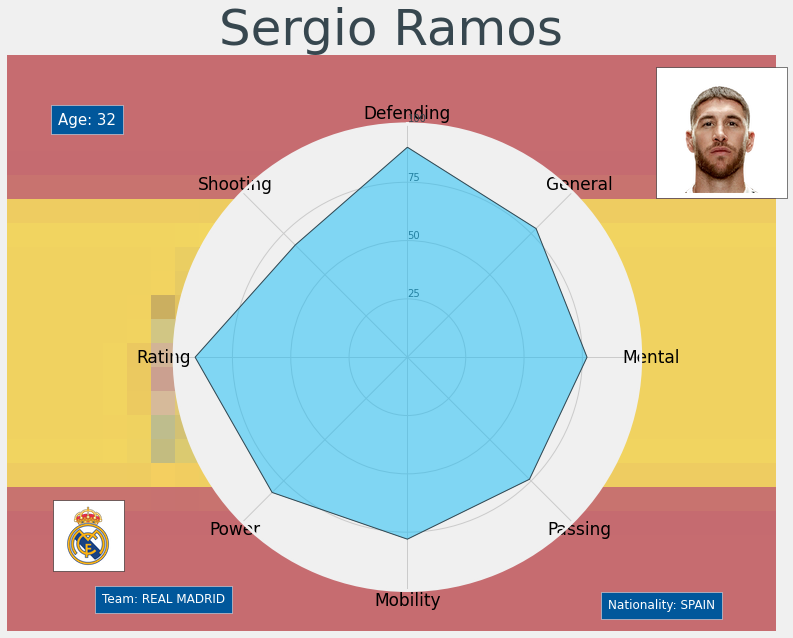

In [11]:
graphPolar(8)

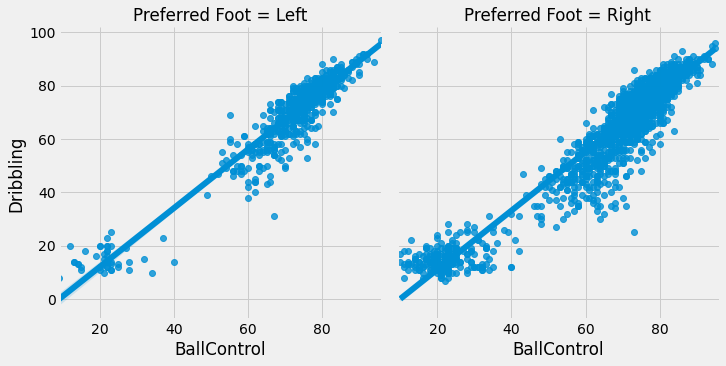

In [12]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')

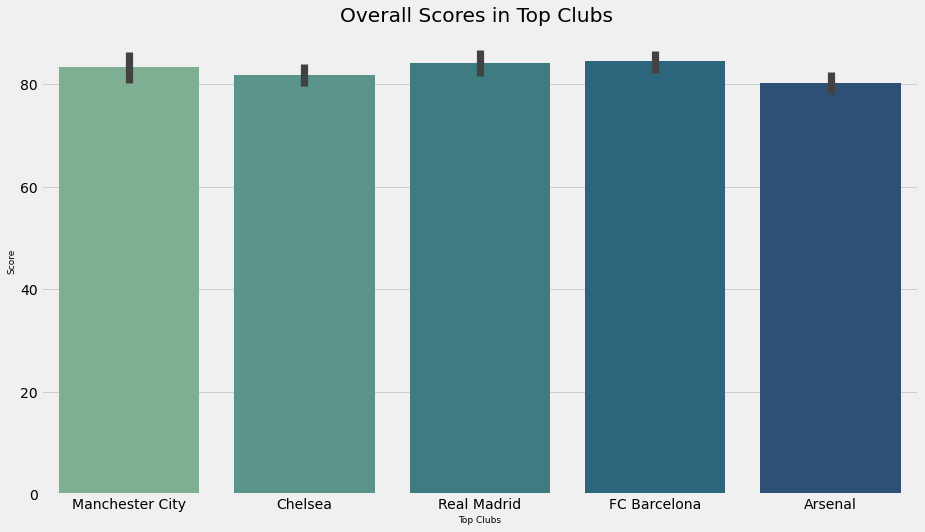

In [13]:
some_clubs = ('Real Madrid', 'Atlético de Madrid', 'Manchester City', 'Arsenal','FC Barcelona', 'Chelsea')
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]
plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.barplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = "crest")
ax.set_xlabel(xlabel = 'Top Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Score', fontsize = 9)
ax.set_title(label = 'Overall Scores in Top Clubs ')
plt.show()

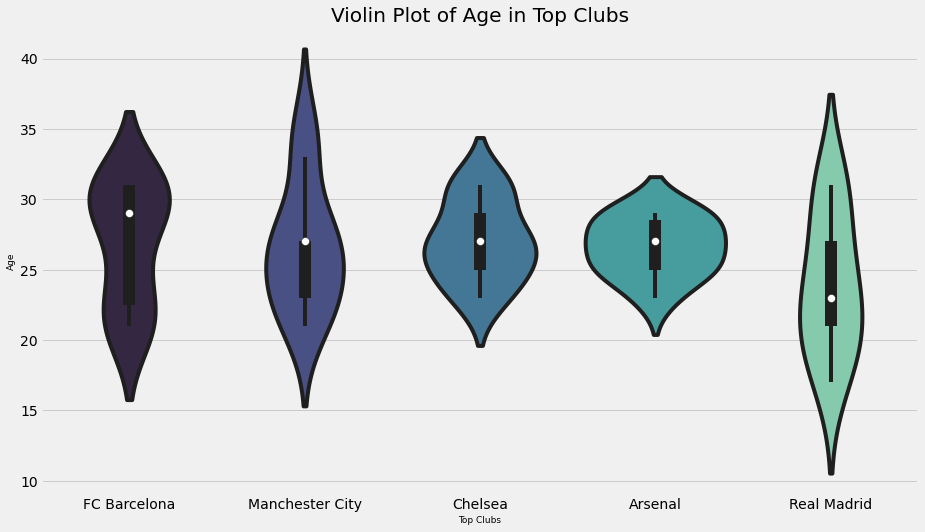

In [14]:
some_clubs = ('Real Madrid', 'Atlético de Madrid', 'Manchester City', 'Arsenal','FC Barcelona', 'Chelsea')
data_club = data.loc[data['Club'].isin(some_clubs) & data['Age']]
plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Age', data = data_club, palette = 'mako')
ax.set_xlabel(xlabel = 'Top Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Age', fontsize = 9)
ax.set_title(label = 'Violin Plot of Age in Top Clubs')
plt.show()

In [15]:
def extract_value_from(value):
    out = value.replace('lbs', '')
    return float(out)
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

In [16]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [17]:
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

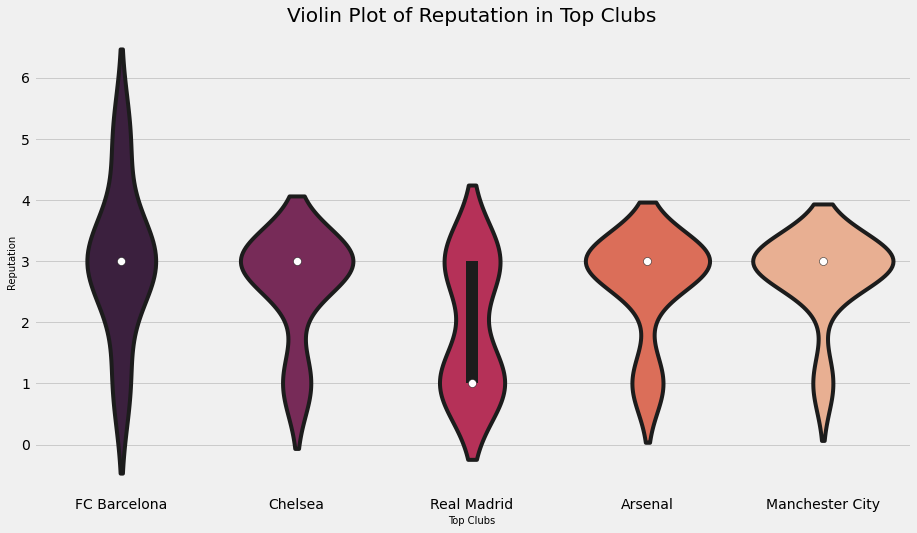

In [18]:
some_clubs = ('Real Madrid', 'Atlético de Madrid', 'Manchester City', 'Arsenal','FC Barcelona', 'Chelsea')
data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]
plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club, palette='rocket')
ax.set_xlabel(xlabel = 'Top Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Reputation', fontsize = 10)
ax.set_title(label = 'Violin Plot of Reputation in Top Clubs')
plt.show()

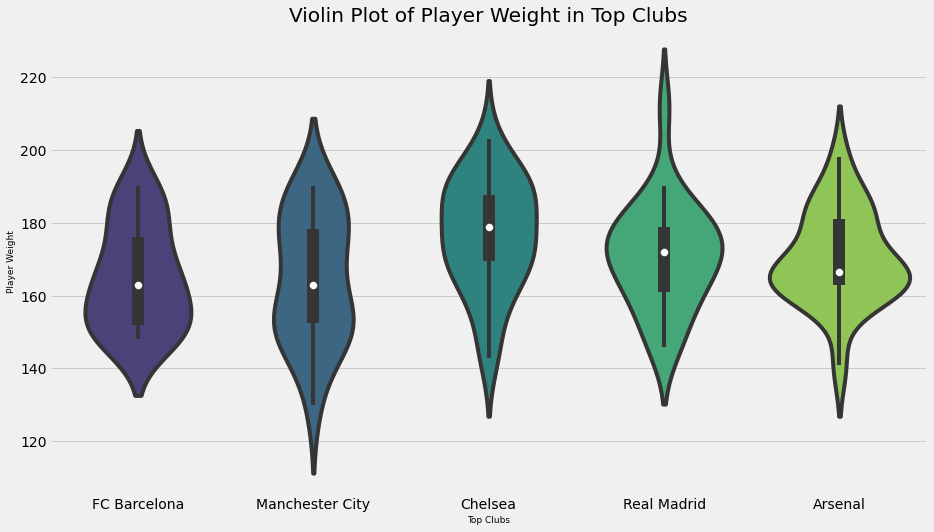

In [19]:
some_clubs = ('Real Madrid', 'Atlético de Madrid', 'Manchester City', 'Arsenal','FC Barcelona', 'Chelsea')
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Weight']]
plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Weight', data = data_clubs, palette = 'viridis')
ax.set_xlabel(xlabel = 'Top Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Player Weight', fontsize = 9)
ax.set_title(label = 'Violin Plot of Player Weight in Top Clubs')
plt.show()

Text(0.5, 1.0, 'Comparison of Preferred Foot by Players')

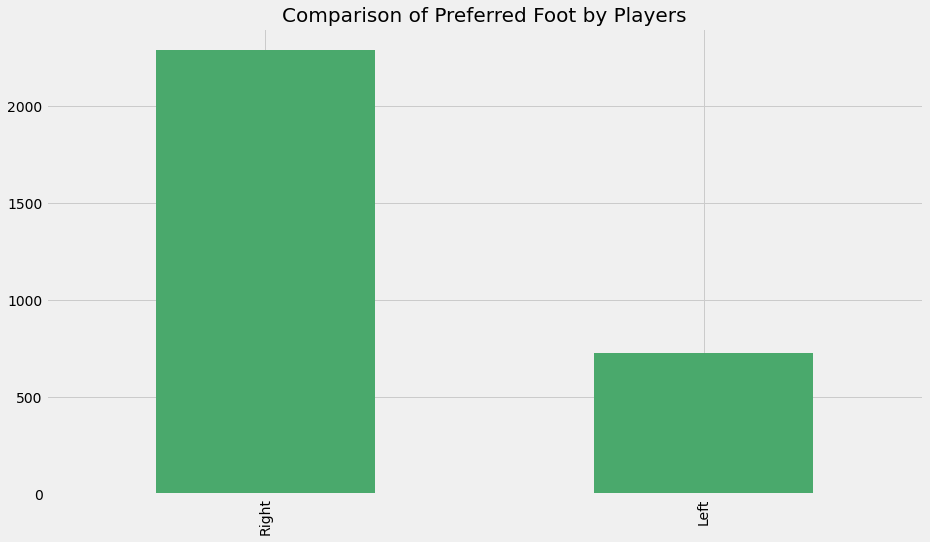

In [20]:
data['Preferred Foot'].value_counts().head(50).plot.bar(color = '#4aa96c')
plt.title('Comparison of Preferred Foot by Players', fontsize = 20)

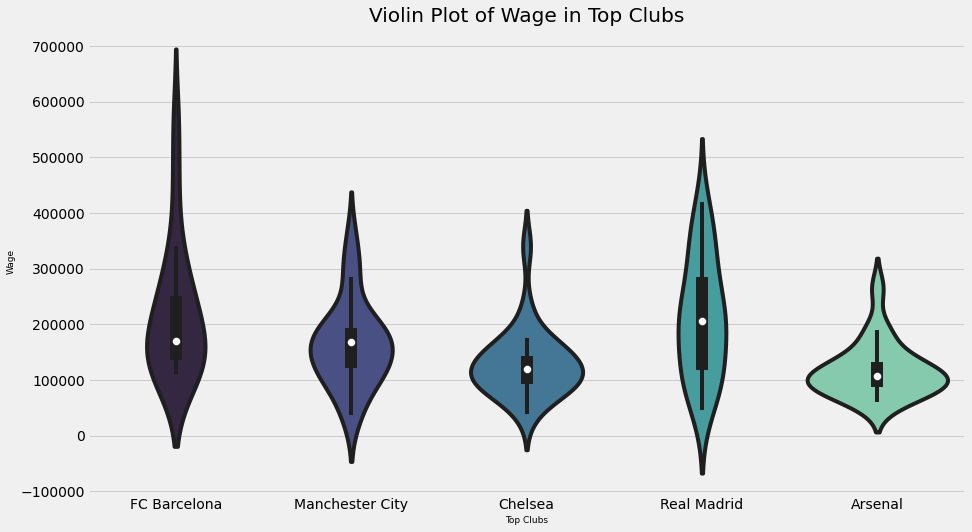

In [21]:
some_clubs = ('Real Madrid', 'Atlético de Madrid', 'Manchester City', 'Arsenal','FC Barcelona', 'Chelsea')
data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]
plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Wage', data = data_club, palette = 'mako')
ax.set_xlabel(xlabel = 'Top Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Violin Plot of Wage in Top Clubs')
plt.show()